In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from kitti_data import pykitti
from kitti_data.pykitti.tracklet import parseXML, TRUNC_IN_IMAGE, TRUNC_TRUNCATED
from kitti_data.draw import *
from kitti_data.io import *


In [2]:
def obj_to_gt_boxes3d(objs):

    num        = len(objs)
    gt_boxes3d = np.zeros((num,8,3),dtype=np.float32)
    gt_labels  = np.zeros((num),    dtype=np.int32)

    for n in range(num):
        obj = objs[n]
        b   = obj.box
        label = 1 #<todo>

        gt_labels [n]=label
        gt_boxes3d[n]=b

    return  gt_boxes3d, gt_labels

In [3]:
basedir = '/home/minh/Documents/Online_courses/Didi_challenge/data/KITTI_data/2011_09_26'
date = '2011_09_26'
drive = '0005'

# The range argument is optional - default is None, which loads the whole dataset
dataset = pykitti.raw(basedir, date, drive) #, range(0, 50, 5))

# Load some data
dataset.load_calib()         # Calibration data are accessible as named tuples
dataset.load_timestamps()    # Timestamps are parsed into datetime objects
dataset.load_oxts()          # OXTS packets are loaded as named tuples
dataset.load_gray()         # Left/right images are accessible as named tuples
dataset.load_rgb()          # Left/right images are accessible as named tuples
dataset.load_velo()          # Each scan is a Nx4 array of [x,y,z,reflectance]

tracklet_file = '/home/minh/Documents/Online_courses/Didi_challenge/data/KITTI_data/2011_09_26/2011_09_26_0005/2011_09_26_drive_0005_sync/tracklet_labels.xml'

num_frames=len(dataset.velo)
# findCarOnly parameter to exclude other objects - default is True
objects = read_objects(tracklet_file, num_frames, findCarOnly=True)



Loading OXTS timestamps from 2011_09_26_drive_0005_sync...
Found 154 timestamps...
done.
Loading OXTS data from 2011_09_26_drive_0005_sync...
Found 154 OXTS measurements...
done.
Loading monochrome images from 2011_09_26_drive_0005_sync...
Found 154 image pairs...
done.
Loading color images from 2011_09_26_drive_0005_sync...
Found 154 image pairs...
done.
Found 154 Velodyne scans...
done.
('parsing tracklet file', '/home/minh/Documents/Online_courses/Didi_challenge/data/KITTI_data/2011_09_26/2011_09_26_0005/2011_09_26_drive_0005_sync/tracklet_labels.xml')
('file contains', 15, 'tracklets')
('loaded', 15, 'tracklets')


In [4]:
if not os.path.exists('./extract_kiti/0005'):
    os.makedirs('./extract_kiti/0005')

In [5]:
def make_rgb(dataset, directory = './extract_kiti/0005/rgb'):
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    num_frames=len(dataset.velo)
    for n in range(num_frames):
        print('rgb', n)
        rgb = dataset.rgb[n][0]
        rgb =(rgb*255).astype(np.uint8)
        rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
        cv2.imwrite(directory + '/rgb_' + str(n) + '.png', rgb)
        
make_rgb(dataset)  


('rgb', 0)
('rgb', 1)
('rgb', 2)
('rgb', 3)
('rgb', 4)
('rgb', 5)
('rgb', 6)
('rgb', 7)
('rgb', 8)
('rgb', 9)
('rgb', 10)
('rgb', 11)
('rgb', 12)
('rgb', 13)
('rgb', 14)
('rgb', 15)
('rgb', 16)
('rgb', 17)
('rgb', 18)
('rgb', 19)
('rgb', 20)
('rgb', 21)
('rgb', 22)
('rgb', 23)
('rgb', 24)
('rgb', 25)
('rgb', 26)
('rgb', 27)
('rgb', 28)
('rgb', 29)
('rgb', 30)
('rgb', 31)
('rgb', 32)
('rgb', 33)
('rgb', 34)
('rgb', 35)
('rgb', 36)
('rgb', 37)
('rgb', 38)
('rgb', 39)
('rgb', 40)
('rgb', 41)
('rgb', 42)
('rgb', 43)
('rgb', 44)
('rgb', 45)
('rgb', 46)
('rgb', 47)
('rgb', 48)
('rgb', 49)
('rgb', 50)
('rgb', 51)
('rgb', 52)
('rgb', 53)
('rgb', 54)
('rgb', 55)
('rgb', 56)
('rgb', 57)
('rgb', 58)
('rgb', 59)
('rgb', 60)
('rgb', 61)
('rgb', 62)
('rgb', 63)
('rgb', 64)
('rgb', 65)
('rgb', 66)
('rgb', 67)
('rgb', 68)
('rgb', 69)
('rgb', 70)
('rgb', 71)
('rgb', 72)
('rgb', 73)
('rgb', 74)
('rgb', 75)
('rgb', 76)
('rgb', 77)
('rgb', 78)
('rgb', 79)
('rgb', 80)
('rgb', 81)
('rgb', 82)
('rgb', 83)
('

In [6]:
def make_lidar(dataset, directory = './extract_kiti/0005/lidar'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    num_frames=len(dataset.velo)
    for n in range(num_frames):
        print('lidar', n)
        lidar = dataset.velo[n]
        np.save(directory + '/lidar_' + str(n) + '.npy',lidar)
        
make_lidar(dataset)
    

('lidar', 0)
('lidar', 1)
('lidar', 2)
('lidar', 3)
('lidar', 4)
('lidar', 5)
('lidar', 6)
('lidar', 7)
('lidar', 8)
('lidar', 9)
('lidar', 10)
('lidar', 11)
('lidar', 12)
('lidar', 13)
('lidar', 14)
('lidar', 15)
('lidar', 16)
('lidar', 17)
('lidar', 18)
('lidar', 19)
('lidar', 20)
('lidar', 21)
('lidar', 22)
('lidar', 23)
('lidar', 24)
('lidar', 25)
('lidar', 26)
('lidar', 27)
('lidar', 28)
('lidar', 29)
('lidar', 30)
('lidar', 31)
('lidar', 32)
('lidar', 33)
('lidar', 34)
('lidar', 35)
('lidar', 36)
('lidar', 37)
('lidar', 38)
('lidar', 39)
('lidar', 40)
('lidar', 41)
('lidar', 42)
('lidar', 43)
('lidar', 44)
('lidar', 45)
('lidar', 46)
('lidar', 47)
('lidar', 48)
('lidar', 49)
('lidar', 50)
('lidar', 51)
('lidar', 52)
('lidar', 53)
('lidar', 54)
('lidar', 55)
('lidar', 56)
('lidar', 57)
('lidar', 58)
('lidar', 59)
('lidar', 60)
('lidar', 61)
('lidar', 62)
('lidar', 63)
('lidar', 64)
('lidar', 65)
('lidar', 66)
('lidar', 67)
('lidar', 68)
('lidar', 69)
('lidar', 70)
('lidar', 71)
('

In [7]:
def make_gt_labels(dataset, dir_3dbox = './extract_kiti/0005/gt_boxes3d', dir_rgb_label = './extract_kiti/0005/gt_labels'):
    if not os.path.exists(dir_3dbox):
        os.makedirs(dir_3dbox)
        
    if not os.path.exists(dir_rgb_label):
        os.makedirs(dir_rgb_label)
        
    for n in range(num_frames):
        print('gt_boxes3d', n)
        objs = objects[n]
        gt_boxes3d, gt_labels = obj_to_gt_boxes3d(objs)

        np.save(dir_3dbox +  '/gt_boxes3d_' + str(n) + '.npy',gt_boxes3d)
        np.save(dir_rgb_label + '/gt_labels_' + str(n) + '.npy',gt_labels)

make_gt_labels(dataset)        

('gt_boxes3d', 0)
('gt_boxes3d', 1)
('gt_boxes3d', 2)
('gt_boxes3d', 3)
('gt_boxes3d', 4)
('gt_boxes3d', 5)
('gt_boxes3d', 6)
('gt_boxes3d', 7)
('gt_boxes3d', 8)
('gt_boxes3d', 9)
('gt_boxes3d', 10)
('gt_boxes3d', 11)
('gt_boxes3d', 12)
('gt_boxes3d', 13)
('gt_boxes3d', 14)
('gt_boxes3d', 15)
('gt_boxes3d', 16)
('gt_boxes3d', 17)
('gt_boxes3d', 18)
('gt_boxes3d', 19)
('gt_boxes3d', 20)
('gt_boxes3d', 21)
('gt_boxes3d', 22)
('gt_boxes3d', 23)
('gt_boxes3d', 24)
('gt_boxes3d', 25)
('gt_boxes3d', 26)
('gt_boxes3d', 27)
('gt_boxes3d', 28)
('gt_boxes3d', 29)
('gt_boxes3d', 30)
('gt_boxes3d', 31)
('gt_boxes3d', 32)
('gt_boxes3d', 33)
('gt_boxes3d', 34)
('gt_boxes3d', 35)
('gt_boxes3d', 36)
('gt_boxes3d', 37)
('gt_boxes3d', 38)
('gt_boxes3d', 39)
('gt_boxes3d', 40)
('gt_boxes3d', 41)
('gt_boxes3d', 42)
('gt_boxes3d', 43)
('gt_boxes3d', 44)
('gt_boxes3d', 45)
('gt_boxes3d', 46)
('gt_boxes3d', 47)
('gt_boxes3d', 48)
('gt_boxes3d', 49)
('gt_boxes3d', 50)
('gt_boxes3d', 51)
('gt_boxes3d', 52)
('g

### Visualize some extracted file

In [12]:
gt_box3d = np.load('./extract_kiti/0005/gt_boxes3d/gt_boxes3d_8.npy')
gt_label = np.load('./extract_kiti/0005/gt_labels/gt_labels_8.npy')
lidar = np.load('./extract_kiti/0005/lidar/lidar_8.npy')
rgb = cv2.cvtColor(cv2.imread('./extract_kiti/0005/rgb/rgb_8.png'), cv2.COLOR_BGR2RGB)
print('gt_box3d: ', gt_box3d.shape)
print('gt_label: ', gt_label.shape)
print('lidar: ', lidar.shape)
print('rgb: ', rgb.shape)

('gt_box3d: ', (3, 8, 3))
('gt_label: ', (3,))
('lidar: ', (123411, 4))
('rgb: ', (375, 1242, 3))


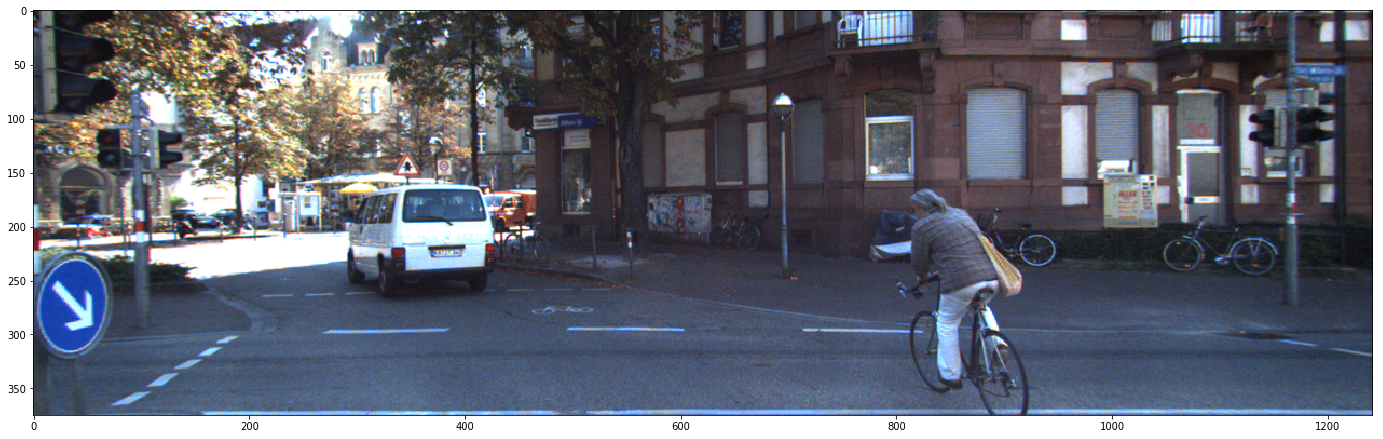

In [13]:
fig, ax = plt.subplots(1,1, figsize = (24,10))
ax.imshow(rgb)

In [14]:
from util_func import *

(64, 256, 2)


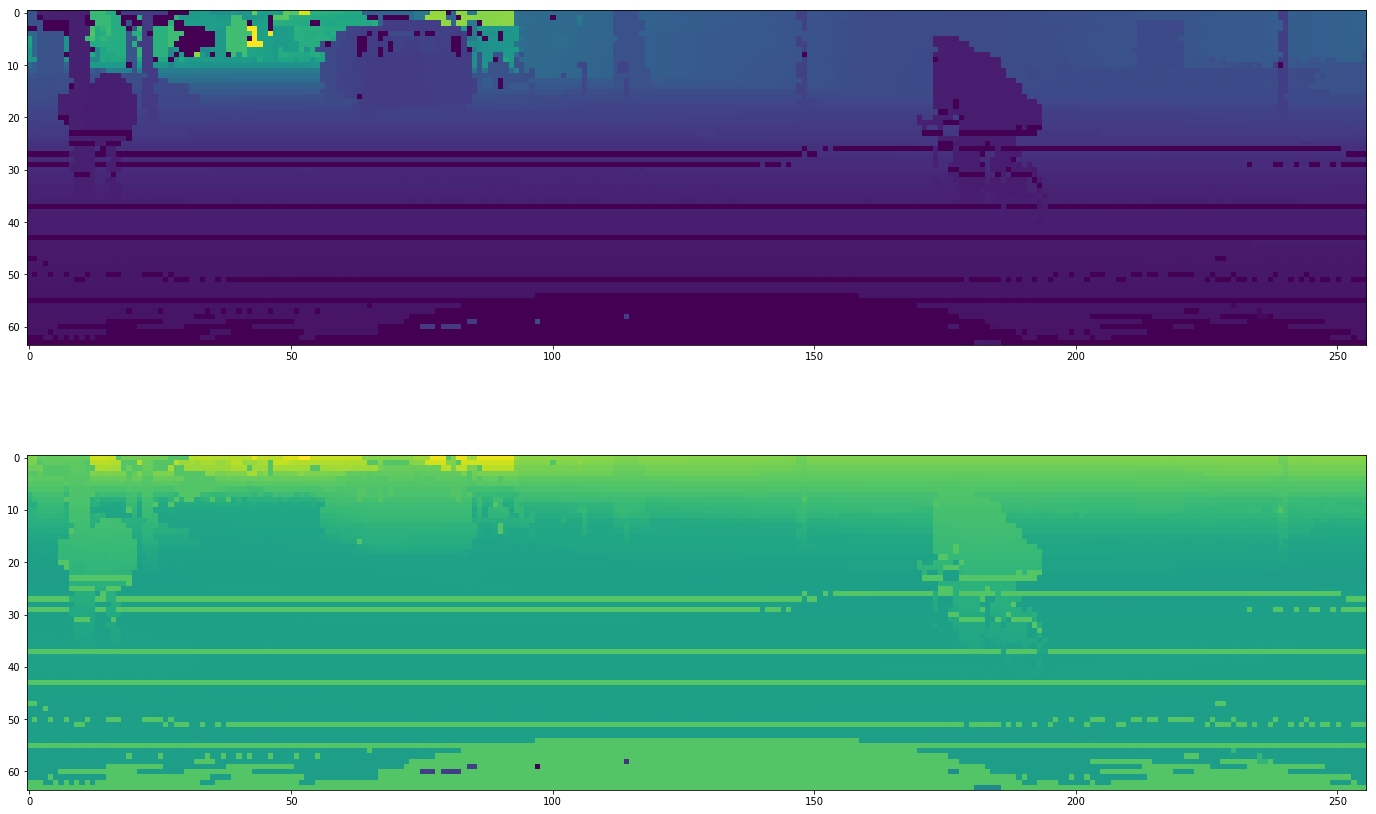

In [33]:
view = cylindrical_projection(lidar, 
                           ver_fov = (-24.4, 2.),#(-24.9, 2.), 
                           hor_fov = (-42.,42.), 
                           v_res = 0.42,
                           h_res = 0.33,
                           d_max = None)
print(view.shape)
fig, ax = plt.subplots(2,1, figsize = (24,15))
ax[0].imshow(view[:,:,0])
ax[1].imshow(view[:,:,1])

In [16]:
viz_mayavi_with_labels(lidar, gt_box3d)